<a href="https://colab.research.google.com/github/grace3999/BB_projects/blob/master/MouseOx_single.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount google drive containings required files: 1) csv of annotation features, 2) netcdf files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
ls

1359_210505_EX_1.txt  1366_210505_EX_1.txt  1373_210512_EX_1.txt
1360_210505_EX_1.txt  1367_210505_EX_1.txt  1377_210512_EX_1.txt
1361_210505_EX_1.txt  1368_210505_EX_1.txt  1378_210512_EX_1.txt
1362_210505_EX_1.txt  1369_210505_EX_1.txt  1379_210512_EX_1.txt
1363_210505_EX_1.txt  1370_210505_EX_1.txt  1382_210512_EX_1.txt
1364_210505_EX_1.txt  1371_210512_EX_1.txt
1365_210505_EX_1.txt  1372_210512_EX_1.txt


In [28]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string
import scipy

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', None)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

### Plan on attack!

- read in folder containing data files
- for each data file
    - clean (update column names, drop first 2 rows with param metadata)
- for final data frame
    - reset_index for each animal separately (so have same time series)
    - update data types
    - filter out bad data (use error codes)
    
- questions to figure out
    - are some error codes more common at beginning of recording etc


### Analysis plan!

- previous pubs:
    - bin by 5 min
        - can be raw or fold change (some show both)
- for us:
    - is there autonomic differences immediately coming out of iso in sham vs. blast
        - compare first 30, 60, 90 seconds 
        - compare rate of change
    - is there autonomic differences immediately after LORR recovery in sham vs. blast
        - compare first 30, 60, 90 seconds 
            - normalize to initial 30 seconds out of iso?
            - normalize to final 30 seconds before LORR flip?
    - are there differences between sham vs. blast in awake baseline compared to exposure iso

### Get and clean data

In [33]:
path = '/content/gdrive/Shareddrives/Schindler Lab/data/MouseOx/data/EX1'

files = os.listdir(path)

data_file_paths = []
for file in files:
    file_path = path + '/' + file
    data_file_paths.append(file_path)
    
data_file_paths

['/content/gdrive/Shareddrives/Schindler Lab/data/MouseOx/data/EX1/1360_210505_EX_1.txt',
 '/content/gdrive/Shareddrives/Schindler Lab/data/MouseOx/data/EX1/1359_210505_EX_1.txt',
 '/content/gdrive/Shareddrives/Schindler Lab/data/MouseOx/data/EX1/1361_210505_EX_1.txt',
 '/content/gdrive/Shareddrives/Schindler Lab/data/MouseOx/data/EX1/1362_210505_EX_1.txt',
 '/content/gdrive/Shareddrives/Schindler Lab/data/MouseOx/data/EX1/1363_210505_EX_1.txt',
 '/content/gdrive/Shareddrives/Schindler Lab/data/MouseOx/data/EX1/1364_210505_EX_1.txt',
 '/content/gdrive/Shareddrives/Schindler Lab/data/MouseOx/data/EX1/1365_210505_EX_1.txt',
 '/content/gdrive/Shareddrives/Schindler Lab/data/MouseOx/data/EX1/1366_210505_EX_1.txt',
 '/content/gdrive/Shareddrives/Schindler Lab/data/MouseOx/data/EX1/1367_210505_EX_1.txt',
 '/content/gdrive/Shareddrives/Schindler Lab/data/MouseOx/data/EX1/1368_210505_EX_1.txt',
 '/content/gdrive/Shareddrives/Schindler Lab/data/MouseOx/data/EX1/1369_210505_EX_1.txt',
 '/content

In [ ]:
final_data = pd.DataFrame()

for file in data_file_paths:
    print(file)
    
    if file.split('/')[-1] == '.DS_Store':
        continue
     
    #get file meta data
    animal = file.split('/')[-1].split('_')[0]
    date = file.split('/')[-1].split('_')[1]
    
    #make dataframe
    data_int = pd.read_table(file, sep=',') 
    data_int = pd.DataFrame(data = data_int)
    
    #drop un used columns
    data_int = data_int.drop(['Custom ID', 'Subject', 'Core', '15Hz'], axis=1)
    
    #update columns names
    data_int.columns = ['time_sec', 'file_marker', 'error_code', 
                        'O2_sat', 'hr_bpm', 'br_brpm', 'pd_um', 'bd_um', 'activity', 'datetime']
    
    #drop rows with param meta data
    data_int = data_int.drop([0, 1], axis=0)
    
    #add meta data
    data_int['animal'] = animal
    data_int['date'] = date
        
    #reset time index
    if final_data.empty:
        final_data = data_int
    else:
        final_data = pd.concat([final_data, data_int], axis=0)
        
    print(final_data.shape,'\n')
    
final_data.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1370_050521_EX.txt
(6900, 12) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1367_050521_EX.txt
(13160, 12) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1363_050521_EX.txt
(23560, 12) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1364_050521_EX.txt
(32560, 12) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1360_050521_EX.txt
(38340, 12) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1359_050521_EX.txt
(44480, 12) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1369_050521_EX.txt
(50960, 12) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1368_050521_EX.txt
(56740, 12) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/MouseOx/050521_single/1361_050521_EX.txt
(61380, 12) 

/Users/abbieschindler/Documents/Schindler_Lab/D

,time_sec,file_marker,error_code,O2_sat,hr_bpm,br_brpm,pd_um,bd_um,activity,datetime,animal,date
2,0,1,0,0,0,0,0,0,0,5/5/2021 2:25:48 PM,1370,050521
3,.07,1,0,0,0,0,0,0,0,5/5/2021 2:25:48 PM,1370,050521
4,.13,1,0,0,0,0,0,0,0,5/5/2021 2:25:48 PM,1370,050521
5,.2,1,0,0,0,0,0,0,0,5/5/2021 2:25:48 PM,1370,050521
6,.27,1,0,0,0,0,0,0,0,5/5/2021 2:25:48 PM,1370,050521


In [ ]:
data_final_clean = final_data[['time_sec', 'animal', 'error_code', 
                                           'O2_sat', 'hr_bpm', 'br_brpm','pd_um', 
                                           'bd_um', 'activity']].astype(float)

data_final_clean['datetime'] = final_data['datetime']
data_final_clean['animal'] = final_data['animal']
data_final_clean['date'] = final_data['date']

data_final_clean['datetime'] = pd.to_datetime(data_final_clean['datetime'])

#update column order
data_final_clean =  data_final_clean[['date', 'animal', 'time_sec', 'error_code', 'O2_sat', 
                            'hr_bpm', 'br_brpm', 'pd_um', 'bd_um', 'activity', 'datetime']]

data_final_clean.head()

,date,animal,time_sec,error_code,O2_sat,hr_bpm,br_brpm,pd_um,bd_um,activity,datetime
2,050521,1370,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48
3,050521,1370,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48
4,050521,1370,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48
5,050521,1370,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48
6,050521,1370,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48


In [ ]:
data_final_clean['animal'].value_counts()

groups_dict = {'1359':'ss', 
               '1360':'ss',
               '1361':'ss', 
               '1362':'bs', 
               '1363':'bs', 
               '1364':'bs', 
               '1365':'sv', 
               '1366':'sv',
               '1367':'sv', 
               '1368':'bv', 
               '1369':'bv', 
               '1370':'bv'}

data_final_clean['group'] = data_final_clean['animal'].map(groups_dict)

data_final_clean.head()

,date,animal,time_sec,error_code,O2_sat,hr_bpm,br_brpm,pd_um,bd_um,activity,datetime,group
2,050521,1370,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48,bv
3,050521,1370,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48,bv
4,050521,1370,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48,bv
5,050521,1370,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48,bv
6,050521,1370,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48,bv


In [ ]:
data_final_clean['time_sec_round'] = np.round(data_final_clean['time_sec'])
data_final_clean.tail()

,date,animal,time_sec,error_code,O2_sat,hr_bpm,br_brpm,pd_um,bd_um,activity,datetime,group,time_sec_round
5697,050521,1366,379.69,7.0,97.2,780.0,184.0,378.0,0.0,1.0,2021-05-05 13:33:50,sv,380.0
5698,050521,1366,379.76,7.0,97.2,780.0,184.0,378.0,0.0,1.0,2021-05-05 13:33:50,sv,380.0
5699,050521,1366,379.82,7.0,97.2,780.0,184.0,378.0,0.0,1.0,2021-05-05 13:33:50,sv,380.0
5700,050521,1366,379.89,7.0,97.2,780.0,184.0,378.0,0.0,1.0,2021-05-05 13:33:50,sv,380.0
5701,050521,1366,379.96,7.0,97.0,780.0,184.0,378.0,0.0,1.0,2021-05-05 13:33:50,sv,380.0


### viz/drop data that is 'unsure'

In [ ]:
data_final_clean.sort_values('animal')['animal'].unique()

In [ ]:
sns.countplot(x='error_code', data=data_final_clean)

In [ ]:
plt.figure(figsize=(15,5))
sns.catplot(x='error_code', data=data_final_clean[data_final_clean['time_sec']<60], kind='count',
              col='time_sec_round', col_wrap=5, sharex=False)

In [ ]:
data_final_clean[(data_final_clean['time_sec']<5)][0:100]

![image.png](attachment:image.png)

In [ ]:
def raster_error_code(data, animal, error_list, error_names):
    data_dict = {}
    colorCodes = ['C{}'.format(i) for i in range(len(error_list))]
    
    data_int = data_final_clean[data_final_clean['animal']==animal]

    for code in error_list:

        data_dict[code] = data_int[data_int['error_code'] == code]['time_sec'].values
        
    # Draw a spike raster plot
    plt.figure(figsize=(50,15))
    params = {'axes.labelsize': 75,
              'axes.titlesize': 75}
    plt.rc('xtick', labelsize=40) 
    plt.rc('ytick', labelsize=40) 
    plt.rcParams.update(params)
    plt.yticks(np.arange(0,len(error_list)), error_names) 
    plt.eventplot(data_dict.values(), color=colorCodes, linelengths = 0.3) 
    plt.xlabel('Time')
    plt.ylabel('Error Code')


    plt.show()    


In [ ]:
error_list = [0,2,3,4,6,7,8,9]
error_code = ['no_error', 'lost_pulse', 'lost_br', 'lost_SpO2', 'lost_signal', 'lost_br_SpO2', 'breath_arti', 'signal_opt']

for animal in data_final_clean['animal'].unique():
    print(animal)
    raster_error_code(data_final_clean, animal, error_list, error_code)


### Viz data

In [ ]:
data_final_clean.head()

,date,animal,time_sec,error_code,O2_sat,hr_bpm,br_brpm,pd_um,bd_um,activity,datetime,group,time_sec_round
2,050521,1370,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48,bv,0.0
3,050521,1370,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48,bv,0.0
4,050521,1370,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48,bv,0.0
5,050521,1370,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48,bv,0.0
6,050521,1370,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-05 14:25:48,bv,0.0


In [ ]:
print(data_final_clean.shape)
data_hr = data_final_clean[data_final_clean['O2_sat']>0]
print(data_hr.shape)
code_drops = [2,3,4,6,8,9]
data_hr = data_hr[~data_hr['error_code'].isin(code_drops)]
#data_hr = data_hr[data_hr['time_sec']<400]
print(data_hr.shape)
data_hr.head()

(81020, 13)
(75168, 13)
(55971, 13)


,date,animal,time_sec,error_code,O2_sat,hr_bpm,br_brpm,pd_um,bd_um,activity,datetime,group,time_sec_round
339,050521,1370,22.47,0.0,92.1,669.0,209.0,153.8,0.0,0.0,2021-05-05 14:26:10,bv,22.0
340,050521,1370,22.53,0.0,92.1,669.0,209.0,153.8,0.0,0.0,2021-05-05 14:26:10,bv,23.0
341,050521,1370,22.60,0.0,92.1,669.0,209.0,153.8,0.0,0.0,2021-05-05 14:26:10,bv,23.0
342,050521,1370,22.67,0.0,92.1,667.0,209.0,153.8,0.0,0.0,2021-05-05 14:26:11,bv,23.0
343,050521,1370,22.73,0.0,92.1,667.0,209.0,153.8,0.0,0.0,2021-05-05 14:26:11,bv,23.0


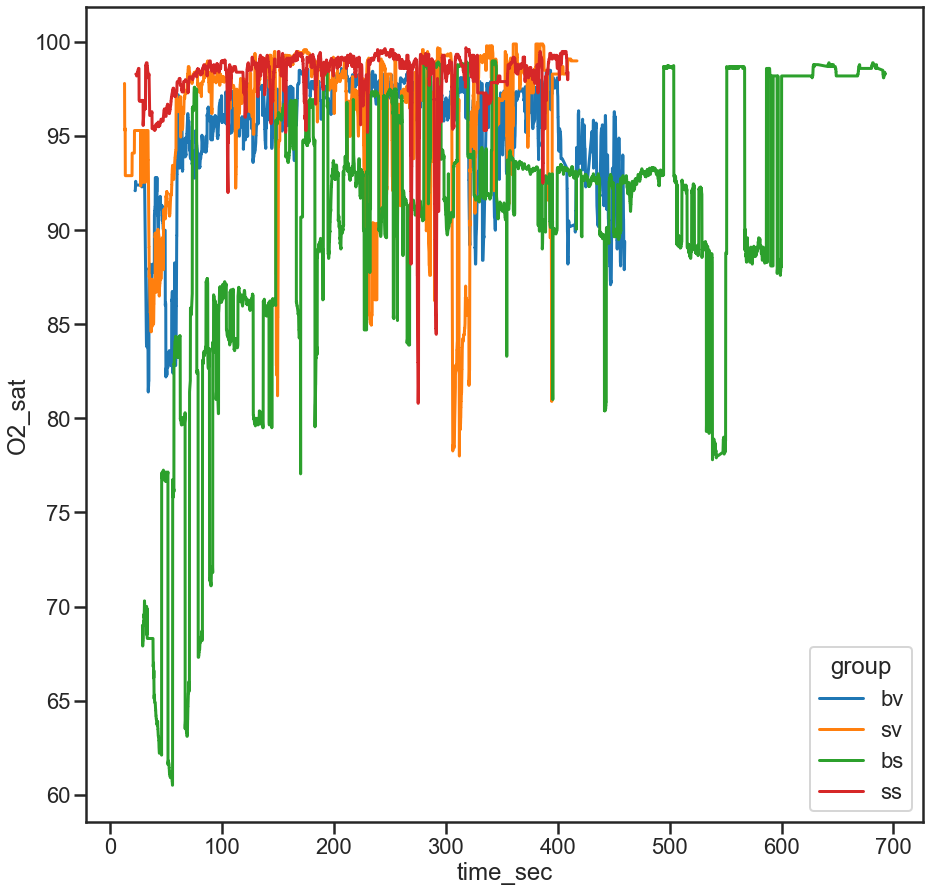

In [ ]:
plt.figure(figsize=(15,15))
sns.lineplot(x='time_sec', y='O2_sat', data=data_hr, ci=None, hue='group')
plt.show()